In [7]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

### Normalising data

In [8]:
#Normalizing= make it easies for the neuron to process the data 
#x-min(x)/(max-min)
#x-0/(255-0)
#x/255
x_train=x_train/255
x_test=x_test/255

## DNN Model Training

In [12]:
from keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import models


In [14]:

model = models.Sequential() # Initialising the ANN
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units = 128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation = 'softmax'))


In [15]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2966 - accuracy: 0.9143
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1445 - accuracy: 0.9570
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1070 - accuracy: 0.9677
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0874 - accuracy: 0.9730: 0s - loss: 0
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0745 - accuracy: 0.9769: 0s
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9794
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0605 - accuracy: 0.9808
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9825
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0495 - accuracy: 0.9836
Epoch 10/100
1875/1875 [==============================

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0111 - accuracy: 0.9963
Epoch 79/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0134 - accuracy: 0.9957
Epoch 80/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 81/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 82/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 83/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 84/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 85/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0138 - accuracy: 0.9956
Epoch 86/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0114 - accuracy: 0.9965
Epoch 87/100
1875/1875 [==============================] - 4s 2ms/step - loss:

In [18]:
import matplotlib.pyplot as imshow

In [19]:
def show_imgs(x):
    plt.figure(1,figsize=(10,10))
    k=0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.title('Actual:'+str(np.argmax(y_test[k]))+'Predict:'+ str(np.argmax(model.predict(x_test[k][None,:]))))
            plt.imshow(np.squeeze(x[k]),cmap='gray')
            k=k+1
    plt.tight_layout()

AxisError: axis 1 is out of bounds for array of dimension 1

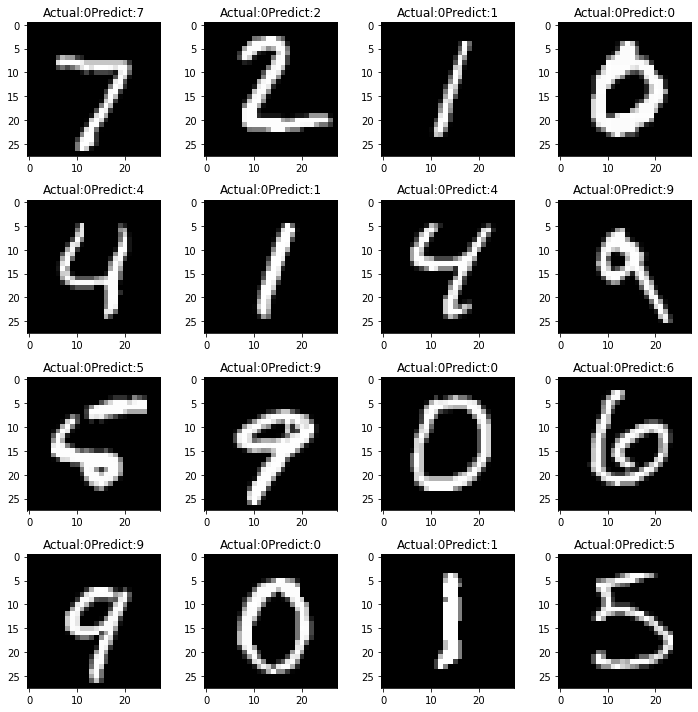

In [20]:
show_imgs(x_test[:16])
print('Actual:'  ,[x for x in np.argmax(y_test[:16],1)])
print('Predicted:'  ,[x for x in np.argmax(model.predict(x_test[:16]),1)])